# Step 2: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the preprocessed clean data
business_df = pd.read_csv('../data/processed_data/preprocessed_business.csv')
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"['Local Services', 'Mailbox Centers', 'Notarie...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
1,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","['Department Stores', 'Electronics', 'Fashion'...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","['Bakeries', 'Bubble Tea', 'Coffee & Tea', 'Fo...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
3,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","['Breweries', 'Brewpubs', 'Food']","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
4,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","['Burgers', 'Fast Food', 'Food', 'Ice Cream & ...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."


# Univariate Analysis

### Numerical columns analysis

In [3]:
business_df.review_count.describe()

count    117618.000000
mean         52.958238
std         135.126694
min           5.000000
25%           9.000000
50%          18.000000
75%          46.000000
max        7568.000000
Name: review_count, dtype: float64

<Axes: xlabel='review_count', ylabel='Count'>

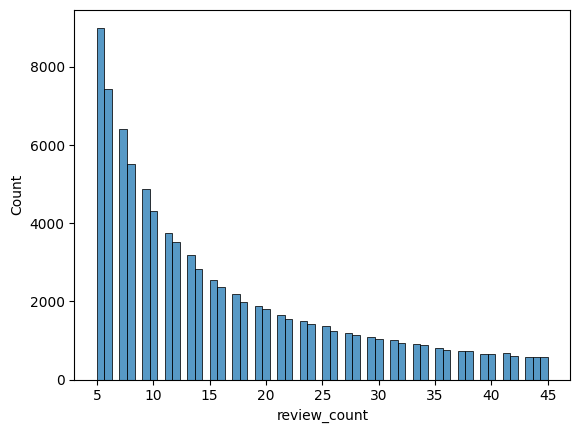

In [4]:
# Ploting the histogram for first three quartiles of review count to have visibility
sns.histplot(business_df[business_df['review_count'] < 46].review_count)

The number of reviews plays a crucial role in gauging a business's success. For instance, a business may have an average rating but a large volume of feedback, indicating success. Conversely, a business with only one review and a high rating may not be well-established.

### Categorical Data Analysis

We will find insights on the categorical columns in the dataset i.e. `categories`  `attributes` `state`


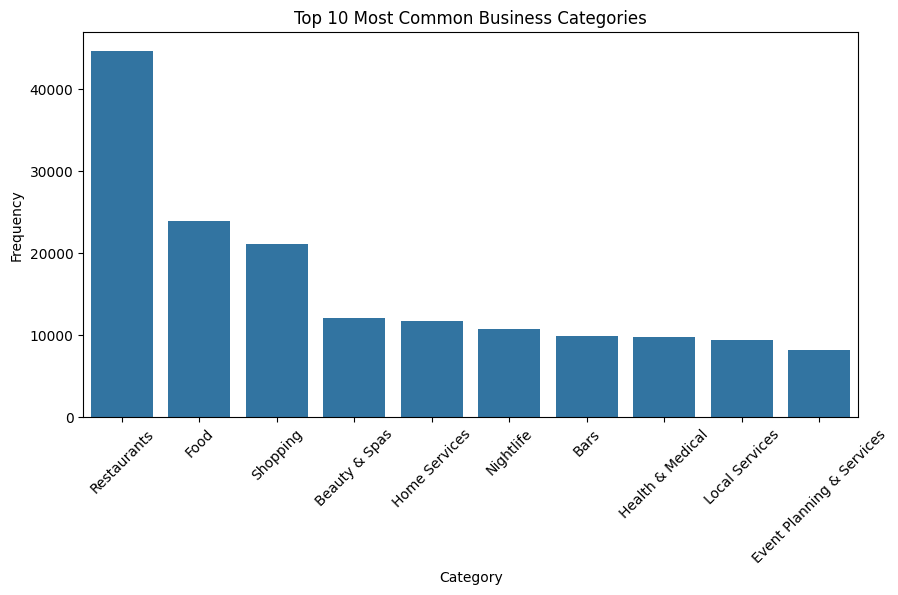

In [5]:
from collections import Counter

# Splitting the categories and creating a flattened list
categories = business_df['categories'].dropna().apply(lambda x: x.strip('[]').split(','))
flattened_categories = [item.strip(' \'') for sublist in categories for item in sublist]

# Counting category occurrences
category_counts = Counter(flattened_categories)
most_common_categories = category_counts.most_common(10)

# Bar plot for the most common categories
plt.figure(figsize=(10, 5))
sns.barplot(x=[x[0] for x in most_common_categories], y=[x[1] for x in most_common_categories])
plt.xticks(rotation=45)
plt.title('Top 10 Most Common Business Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

The above chart gives details about the categories each business belongs to, and majority of our data includes the business in field of Food and Restaurants.

<Figure size 1600x800 with 0 Axes>

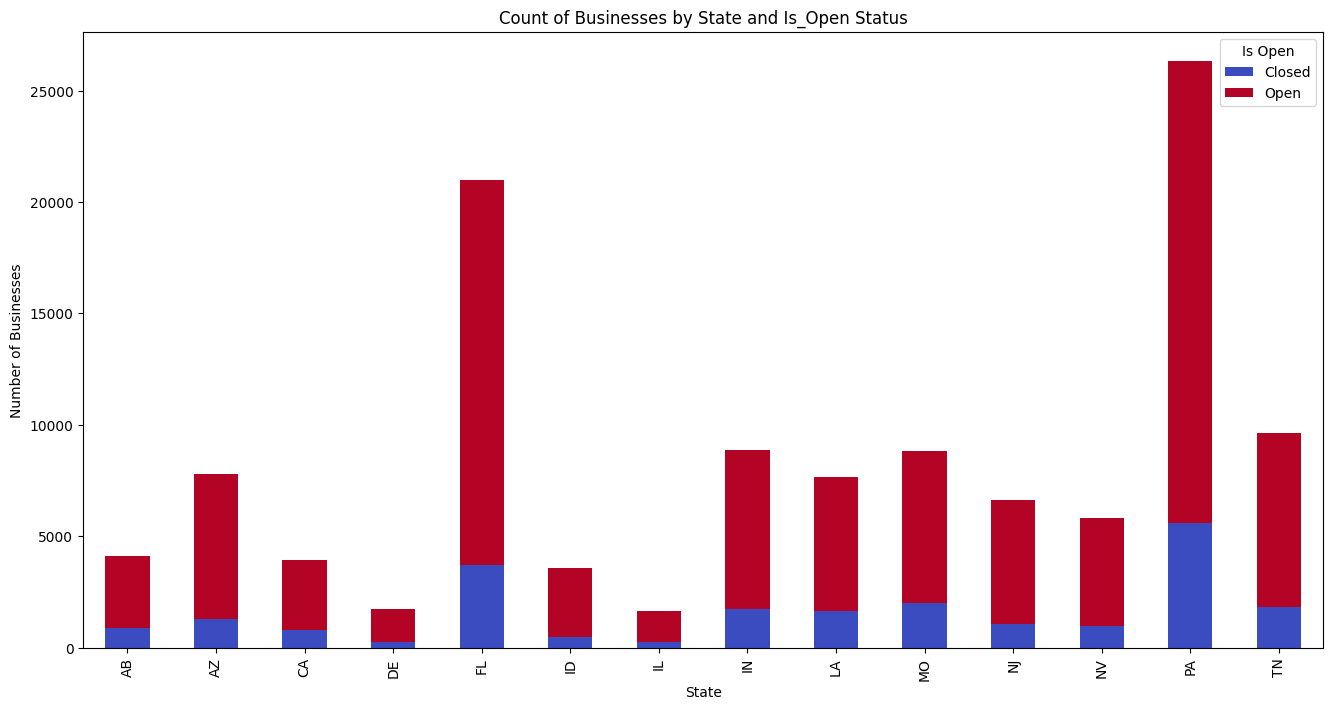

In [6]:
# Count of businesses by state and is_open status
state_is_open_counts = business_df.groupby(['state', 'is_open']).size().unstack().dropna()

# Create bar plot
plt.figure(figsize=(16, 8))
state_is_open_counts.plot(kind='bar', stacked=True, figsize=(16, 8), cmap='coolwarm')
plt.title('Count of Businesses by State and Is_Open Status')
plt.xlabel('State')
plt.ylabel('Number of Businesses')
plt.legend(title='Is Open', labels=['Closed', 'Open'], loc='upper right')
plt.show()

##### **Point Plot** - The code generates a point plot using Seaborn's pointplot function to visualize the relationship between star ratings (x='stars') and average review counts (y='review_count') for businesses in the business_df DataFrame. Each point represents the average review count for businesses with a particular star rating.

The Point plot below shows a generally positive correlation between star ratings and average review counts, indicating that businesses with higher ratings tend to have more reviews. However, there are some outliers, suggesting that other factors may also influence review counts.

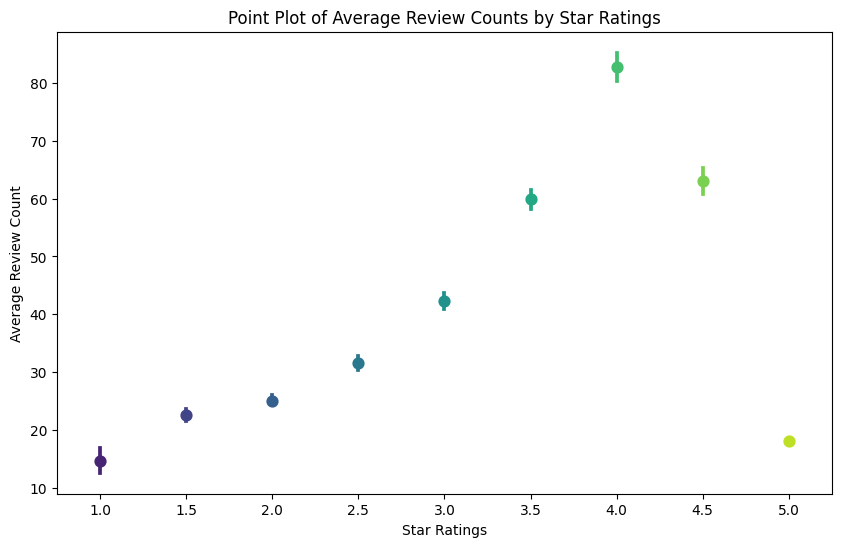

In [7]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='stars', y='review_count', data=business_df, palette='viridis', join=False)
plt.title('Point Plot of Average Review Counts by Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Average Review Count')
plt.show()

#### This code generates a count plot using Seaborn's countplot function to visualize the distribution of business ratings (in stars) in the business_df DataFrame. Each bar in the plot represents the number of businesses that received a specific star rating.

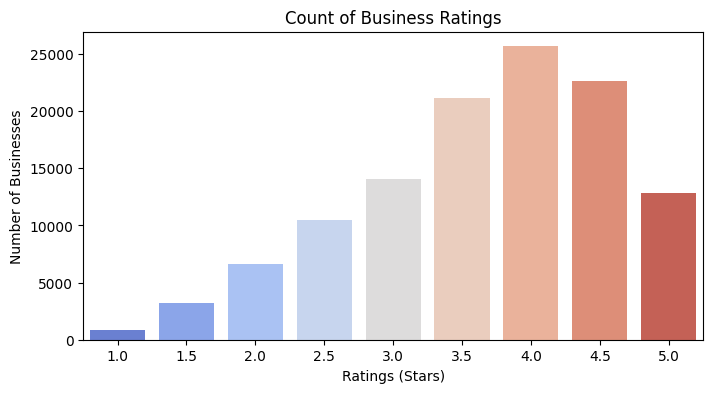

In [8]:
plt.figure(figsize=(8, 4))
sns.countplot(x='stars', data=business_df, palette='coolwarm')
plt.title('Count of Business Ratings')
plt.xlabel('Ratings (Stars)')
plt.ylabel('Number of Businesses')
plt.show()

##### This code creates a horizontal bar chart using Plotly Express to display the top 10 states with the most businesses, with each bar colored based on the number of businesses in the state, using the 'inferno' color scale.

In [9]:
# Assuming business_df contains the actual data
top_states = business_df['state'].value_counts().nlargest(10).reset_index()
top_states.columns = ['state', 'count']

# Create horizontal bar chart with custom color palette
fig = px.bar(
    top_states,
    x='count',
    y='state',
    orientation='h',
    title='Top 10 States with Most Number of Businesses',
    labels={'count': 'Number of Businesses', 'state': 'State'},
    color='count',
    color_continuous_scale='inferno' 
)

fig.show()

##### This code generates a heatmap of the correlation matrix for the numeric columns in the business_df DataFrame

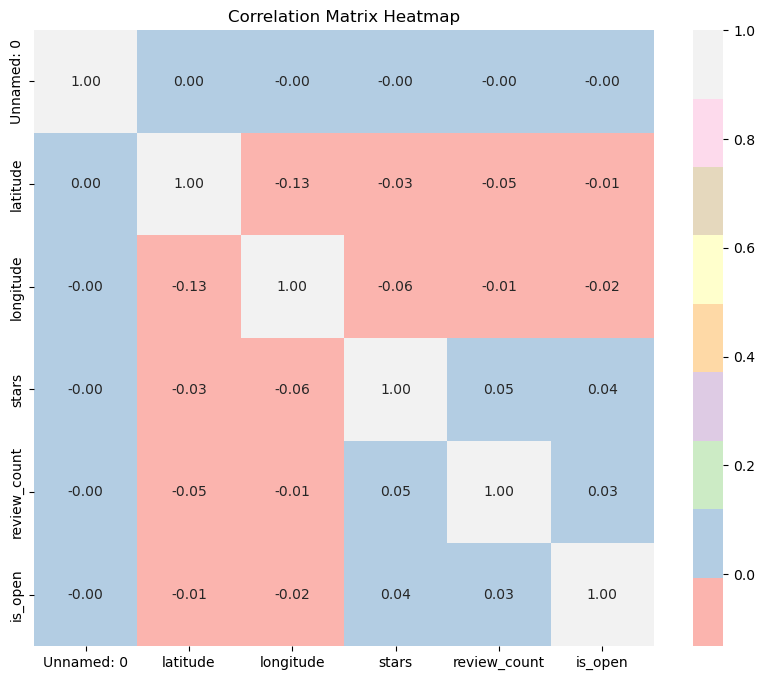

In [49]:

# Select only the numeric columns for the correlation matrix
numeric_cols = business_df.select_dtypes(include=[np.number])

# Generating the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='Pastel1')
plt.title('Correlation Matrix Heatmap')
plt.show()

##### This code creates a stacked bar chart to show the count of businesses based on their star ratings and whether they are open or closed, providing a visual comparison of the distribution of businesses across different star ratings and their open/closed status.

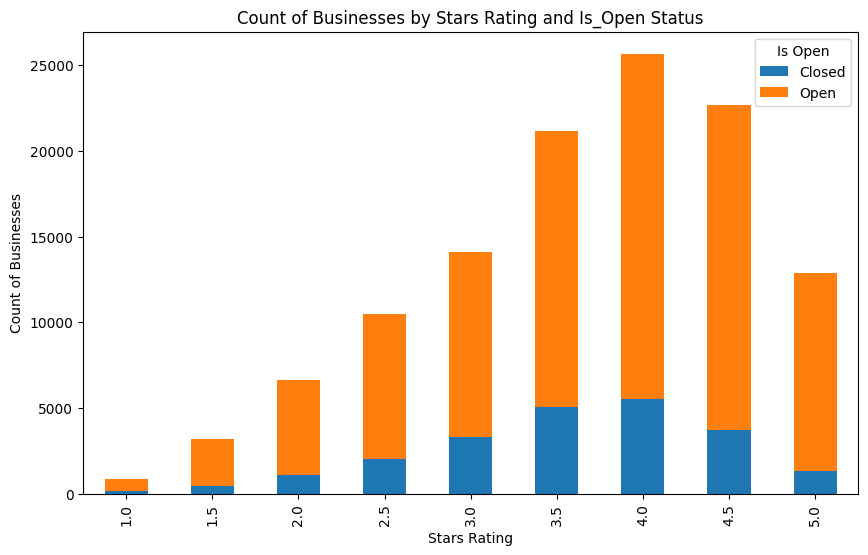

In [10]:
#  Stacked Bar Chart
stars_is_open = pd.crosstab(business_df['stars'], business_df['is_open'])
stars_is_open.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Businesses by Stars Rating and Is_Open Status')
plt.xlabel('Stars Rating')
plt.ylabel('Count of Businesses')
plt.legend(title='Is Open', labels=['Closed', 'Open'])
plt.show()

##### This code generates a boxplot to visualize the distribution of review counts for open and closed businesses, allowing for a comparison of the review count distribution between open and closed businesses.

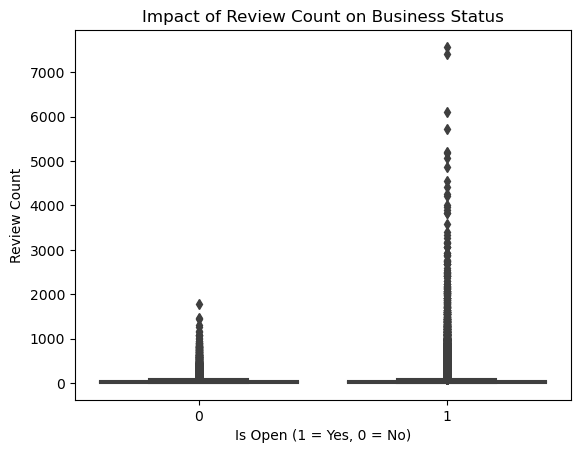

In [76]:
sns.boxplot(x='is_open', y='review_count', data=business_df)
plt.title('Impact of Review Count on Business Status')
plt.xlabel('Is Open (1 = Yes, 0 = No)')
plt.ylabel('Review Count')
plt.show()
